In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_sim/12_Dec.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,12.500000,77.000000,1,6,1,1847.0,1849.0,1961.0,1673.0,1619.0,1562.0,1841.333333,1720.0
1,12.375000,76.916667,1,6,1,1807.0,1867.0,1931.0,1642.0,1573.0,1520.0,1821.333333,1691.0
2,12.250000,76.833333,1,6,1,1778.0,1876.0,1908.0,1626.0,1559.0,1500.0,1801.666667,1672.0
3,12.125000,76.750000,1,6,1,1754.0,1876.0,1883.0,1621.0,1546.0,1497.0,1782.166667,1649.0
4,12.000000,76.666667,2,6,1,1720.0,1847.0,1849.0,1569.0,1533.0,1487.0,1764.416667,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,5.842452,89.215220,23,3,1,1985.0,2067.0,2151.0,1827.0,1683.0,1801.0,2005.666667,1858.0
8924,5.842452,89.215220,24,3,1,1957.0,2055.0,2107.0,1806.0,1662.0,1781.0,1982.500000,1829.0
8925,5.842452,89.215220,24,3,1,1910.0,2052.0,2090.0,1759.0,1623.0,1748.0,1956.500000,1778.0
8926,5.500000,89.215220,24,3,1,1877.0,2024.0,2086.0,1719.0,1620.0,1735.0,1930.583333,1775.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head(105)
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.734770,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.734770,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.734770,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.734770,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.734770,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-1.452658,-0.558380,0.249748,-1.516457,1.461725,-1.360969,-1.152455,-0.866588,-0.591708,-0.602550,-0.862681,-1.006494,-1.110361
101,-1.505469,-0.587899,0.273160,-1.516457,1.461725,-1.360969,-1.273248,-0.930789,-0.667270,-0.704513,-0.990761,-1.105024,-1.183940
102,-1.513013,-0.617418,0.296571,-1.516457,1.461725,-1.360969,-1.363843,-1.028979,-0.674826,-0.753607,-0.904119,-1.142921,-1.257520
103,-1.573369,-0.646936,0.319983,-1.516457,1.461725,-1.360969,-1.390267,-1.134722,-0.773056,-0.783818,-0.881517,-1.237662,-1.327800


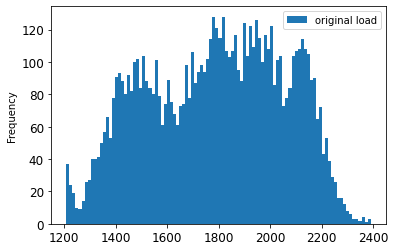

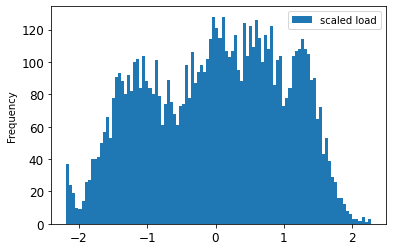

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

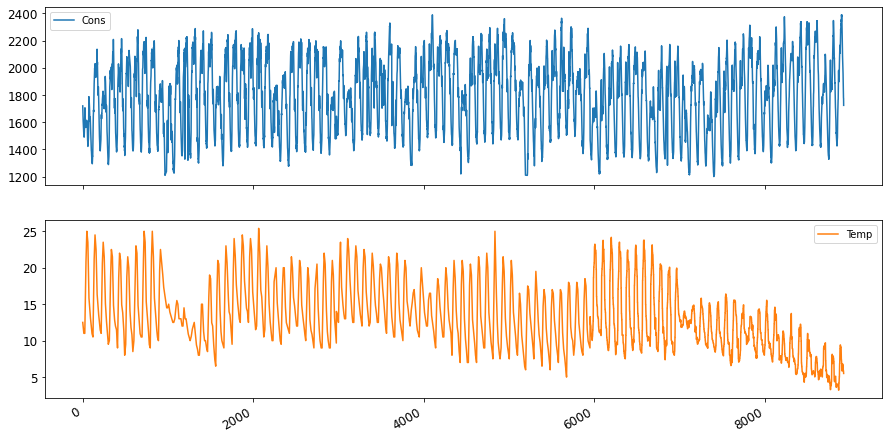

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780,-1.452658
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591,-1.505469
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722,-1.513013
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487,-1.573369
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767,-1.675219
5,-0.675578,-0.587899,0.469816,-1.516457,0.980772,0.73477,-0.367299,0.069990,0.296137,-0.983969,-1.096238,-1.290717,-0.179895,-1.739347
6,-0.724617,-0.617418,0.465134,-1.516457,0.980772,0.73477,-0.439020,-0.039529,0.330140,-0.897111,-1.133908,-1.427144,-0.272281,-1.780842
7,-0.754795,-0.646936,0.460452,-1.516457,0.980772,0.73477,-0.525840,-0.130166,0.330140,-0.874452,-1.228084,-1.374089,-0.367308,-1.761981
8,-0.818923,-0.676455,0.455769,-1.372011,0.980772,0.73477,-0.574912,-0.258567,0.220576,-0.980192,-1.246919,-1.430933,-0.458375,-1.818564
9,-0.890595,-0.705974,0.451087,-1.372011,0.980772,0.73477,-0.676832,-0.368087,0.069453,-1.002851,-1.265754,-1.453671,-0.542512,-1.818564


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,...,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728
5,-0.675578,-0.587899,0.469816,-1.516457,0.980772,0.73477,-0.367299,0.069990,0.296137,-0.983969,...,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578
6,-0.724617,-0.617418,0.465134,-1.516457,0.980772,0.73477,-0.439020,-0.039529,0.330140,-0.897111,...,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617
7,-0.754795,-0.646936,0.460452,-1.516457,0.980772,0.73477,-0.525840,-0.130166,0.330140,-0.874452,...,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795
8,-0.818923,-0.676455,0.455769,-1.372011,0.980772,0.73477,-0.574912,-0.258567,0.220576,-0.980192,...,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923
9,-0.890595,-0.705974,0.451087,-1.372011,0.980772,0.73477,-0.676832,-0.368087,0.069453,-1.002851,...,-0.25686,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923,-0.890595


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-0.920773,-0.735493,0.446405,-1.372011,0.980772,0.73477,-0.725904,-0.439841,-0.040111,-0.995298,...,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923,-0.890595,-0.920773
11,-0.913229,-0.765012,0.441723,-1.372011,0.980772,0.73477,-0.756102,-0.526701,-0.130784,-0.987745,...,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923,-0.890595,-0.920773,-0.913229
12,-0.984901,-0.794531,0.437040,-1.227565,0.980772,0.73477,-0.820274,-0.575796,-0.259239,-1.025510,...,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923,-0.890595,-0.920773,-0.913229,-0.984901
13,-1.075435,-0.794531,0.437040,-1.227565,0.980772,0.73477,-0.891995,-0.677762,-0.368803,-1.116144,...,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923,-0.890595,-0.920773,-0.913229,-0.984901,-1.075435
14,-1.067890,-0.794531,0.437040,-1.227565,0.980772,0.73477,-0.922193,-0.726857,-0.440586,-1.127473,...,-0.675578,-0.724617,-0.754795,-0.818923,-0.890595,-0.920773,-0.913229,-0.984901,-1.075435,-1.067890


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7283 entries, 10 to 7292
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7283 non-null   float64
 1   Temp           7283 non-null   float64
 2   Hum            7283 non-null   float64
 3   A              7283 non-null   float64
 4   B              7283 non-null   float64
 5   C              7283 non-null   float64
 6   D              7283 non-null   float64
 7   E              7283 non-null   float64
 8   F              7283 non-null   float64
 9   G              7283 non-null   float64
 10  H              7283 non-null   float64
 11  I              7283 non-null   float64
 12  J              7283 non-null   float64
 13  y_t+100        7283 non-null   float64
 14  Cons_t-10      7283 non-null   float64
 15  Cons_t-9       7283 non-null   float64
 16  Cons_t-8       7283 non-null   float64
 17  Cons_t-7       7283 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.811020
11,-1.822336
12,-1.863831
13,-1.807247
14,-1.773297
...,...
7288,-1.264046
7289,-1.354580
7290,-1.430024
7291,-1.577141


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-0.920773,-0.920773,-0.890595,-0.818923,-0.754795,-0.724617,-0.675578,-0.573728,-0.524689,-0.437928,...,-1.372011,0.980772,0.734770,-0.725904,-0.439841,-0.040111,-0.995298,-1.258220,-1.518095,-0.619721
11,-0.913229,-0.913229,-0.920773,-0.890595,-0.818923,-0.754795,-0.724617,-0.675578,-0.573728,-0.524689,...,-1.372011,0.980772,0.734770,-0.756102,-0.526701,-0.130784,-0.987745,-1.265754,-1.495357,-0.688352
12,-0.984901,-0.984901,-0.913229,-0.920773,-0.890595,-0.818923,-0.754795,-0.724617,-0.675578,-0.573728,...,-1.227565,0.980772,0.734770,-0.820274,-0.575796,-0.259239,-1.025510,-1.326027,-1.555991,-0.752032
13,-1.075435,-1.075435,-0.984901,-0.913229,-0.920773,-0.890595,-0.818923,-0.754795,-0.724617,-0.675578,...,-1.227565,0.980772,0.734770,-0.891995,-0.677762,-0.368803,-1.116144,-1.314726,-1.578729,-0.814063
14,-1.067890,-1.067890,-1.075435,-0.984901,-0.913229,-0.920773,-0.890595,-0.818923,-0.754795,-0.724617,...,-1.227565,0.980772,0.734770,-0.922193,-0.726857,-0.440586,-1.127473,-1.367464,-1.502937,-0.869166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.388889,-0.388889,-0.264405,-0.139921,-0.234227,-0.173871,-0.173871,-0.026754,0.022285,0.146768,...,1.516906,1.461725,-1.360969,-0.174784,0.145521,0.677722,-0.353305,-1.133908,-0.305410,0.001909
7289,-0.513372,-0.513372,-0.388889,-0.264405,-0.139921,-0.234227,-0.173871,-0.173871,-0.026754,0.022285,...,1.516906,1.461725,-1.360969,-0.235181,0.020896,0.530377,-0.489257,-1.243152,-0.438048,-0.089487
7290,-0.573728,-0.573728,-0.513372,-0.388889,-0.264405,-0.139921,-0.234227,-0.173871,-0.173871,-0.026754,...,1.516906,1.461725,-1.360969,-0.140811,-0.028199,0.420813,-0.602550,-1.273288,-0.517630,-0.176595
7291,-0.671806,-0.671806,-0.573728,-0.513372,-0.388889,-0.264405,-0.139921,-0.234227,-0.173871,-0.173871,...,1.516906,1.461725,-1.360969,-0.265379,-0.175484,0.311249,-0.685631,-1.401368,-0.665426,-0.262713


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7283,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1338.0,10.012452,92.800354,1.0,2.0,1.0,1429.0,1522.0,1619.0,1464.0,1471.0,1322.0,1467.500000
7394,1321.0,9.842452,92.821242,1.0,2.0,1.0,1409.0,1495.0,1619.0,1455.0,1465.0,1292.0,1442.666667
7395,1302.0,9.672452,92.842130,1.0,2.0,1.0,1370.0,1480.0,1587.0,1429.0,1444.0,1291.0,1418.916667
7396,1288.0,9.672452,92.842130,2.0,2.0,1.0,1363.0,1453.0,1545.0,1421.0,1423.0,1269.0,1397.500000
7397,1263.0,9.672452,92.842130,2.0,2.0,1.0,1338.0,1429.0,1522.0,1388.0,1401.0,1260.0,1375.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1684.0,7.492452,95.488050,24.0,4.0,0.0,1789.0,1912.0,1995.0,1767.0,1718.0,1590.0,1839.916667
8350,1656.0,7.282452,95.488050,24.0,4.0,0.0,1772.0,1899.0,1977.0,1736.0,1695.0,1566.0,1813.166667
8351,1647.0,7.282452,95.544320,24.0,4.0,0.0,1740.0,1869.0,1953.0,1714.0,1682.5,1539.0,1787.666667
8352,1627.0,7.282452,95.544320,1.0,5.0,1.0,1710.0,1839.0,1935.0,1681.0,1670.0,1504.0,1762.000000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,-1.416594,-1.825778,-1.679033
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,-1.463785,-1.836739,-1.753144
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,-1.442005,-1.880584,-1.822274
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,-1.514607,-1.869623,-1.884864
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,-1.565428,-1.858661,-1.943717


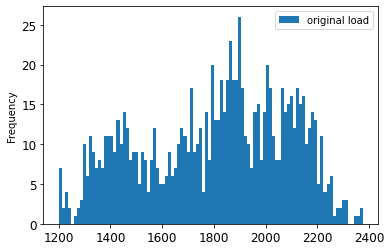

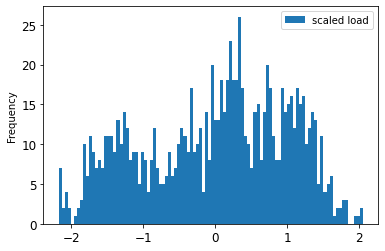

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226,-1.505260
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021,-1.595124
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768,-1.645448
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797,-1.688583
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448,-1.659827
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,-1.416594,-1.825778,-1.679033,-1.688583
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,-1.463785,-1.836739,-1.753144,-1.706556
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,-1.442005,-1.880584,-1.822274,-1.756880
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,-1.514607,-1.869623,-1.884864,-1.807204
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,-1.565428,-1.858661,-1.943717,-1.846744


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,...,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,...,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,...,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,...,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,...,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,...,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202,-2.101958


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7403,-2.148687,-0.541135,0.884041,-1.369419,-0.951768,0.654167,-2.012023,-1.789121,-1.540694,-1.683722,...,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202,-2.101958,-2.148687
7404,-2.173849,-0.541135,0.884041,-1.225087,-0.951768,0.654167,-2.051418,-1.839136,-1.565675,-1.697929,...,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202,-2.101958,-2.148687,-2.173849
7405,-2.166660,-0.541135,0.884041,-1.225087,-0.951768,0.654167,-2.062163,-1.928449,-1.654890,-1.751206,...,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202,-2.101958,-2.148687,-2.173849,-2.166660
7406,-2.159471,-0.545189,0.907146,-1.225087,-0.951768,0.654167,-2.090814,-2.035625,-1.715557,-1.765413,...,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202,-2.101958,-2.148687,-2.173849,-2.166660,-2.159471
7407,-2.152282,-0.549243,0.930251,-1.225087,-0.951768,0.654167,-2.137372,-2.003473,-1.783361,-1.747654,...,-2.055229,-2.022878,-2.062418,-2.073202,-2.101958,-2.148687,-2.173849,-2.166660,-2.159471,-2.152282


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-1.864717
7404,-1.832366
7405,-1.800015
7406,-1.893473
7407,-1.817987
...,...
8249,-0.434080
8250,-0.534728
8251,-0.567079
8252,-0.638970


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7403,-2.148687,-2.148687,-2.101958,-2.073202,-2.062418,-2.022878,-2.055229,-1.947392,-1.857528,-1.807204,...,-1.369419,-0.951768,0.654167,-2.012023,-1.789121,-1.540694,-1.683722,-1.608989,-1.913467,-1.994475
7404,-2.173849,-2.173849,-2.148687,-2.101958,-2.073202,-2.062418,-2.022878,-2.055229,-1.947392,-1.857528,...,-1.225087,-0.951768,0.654167,-2.051418,-1.839136,-1.565675,-1.697929,-1.638029,-1.939044,-2.045232
7405,-2.166660,-2.166660,-2.173849,-2.148687,-2.101958,-2.073202,-2.062418,-2.022878,-2.055229,-1.947392,...,-1.225087,-0.951768,0.654167,-2.062163,-1.928449,-1.654890,-1.751206,-1.605359,-1.928082,-2.087581
7406,-2.159471,-2.159471,-2.166660,-2.173849,-2.148687,-2.101958,-2.073202,-2.062418,-2.022878,-2.055229,...,-1.225087,-0.951768,0.654167,-2.090814,-2.035625,-1.715557,-1.765413,-1.670700,-1.946351,-2.124015
7407,-2.152282,-2.152282,-2.159471,-2.166660,-2.173849,-2.148687,-2.101958,-2.073202,-2.062418,-2.022878,...,-1.225087,-0.951768,0.654167,-2.137372,-2.003473,-1.783361,-1.747654,-1.714261,-1.924429,-2.153908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,0.317184,0.317184,0.450183,0.608344,0.723370,0.766504,0.892314,0.942638,1.043286,1.165501,...,1.517204,-0.393374,0.654167,0.767160,1.165360,1.578293,0.262648,-0.269489,0.191086,0.966258
8250,0.216536,0.216536,0.317184,0.450183,0.608344,0.723370,0.766504,0.892314,0.942638,1.043286,...,1.517204,-0.393374,0.654167,0.724183,1.043894,1.481940,0.170302,-0.309420,0.077820,0.856647
8251,0.112294,0.112294,0.216536,0.317184,0.450183,0.608344,0.723370,0.766504,0.892314,0.942638,...,1.517204,-0.393374,0.654167,0.609578,0.943863,1.410567,0.053094,-0.360241,-0.068330,0.744234
8252,-0.042273,-0.042273,0.112294,0.216536,0.317184,0.450183,0.608344,0.723370,0.766504,0.892314,...,1.661535,-0.393374,0.654167,0.451995,0.893848,1.296371,-0.099633,-0.552635,-0.134097,0.628396


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=1),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=2)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=4)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=8)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.3))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))

model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(64,activation='linear')))

#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 128)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=500,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
15/15 [==============================] - 1s 77ms/step - loss: 0.9214 - val_loss: 0.7299
Epoch 2/300
15/15 [==============================] - 0s 33ms/step - loss: 0.7492 - val_loss: 0.5684
Epoch 3/300
15/15 [==============================] - 0s 29ms/step - loss: 0.6219 - val_loss: 0.4580
Epoch 4/300
15/15 [==============================] - 0s 29ms/step - loss: 0.5437 - val_loss: 0.3916
Epoch 5/300
15/15 [==============================] - 0s 30ms/step - loss: 0.4902 - val_loss: 0.3386
Epoch 6/300
15/15 [==============================] - 0s 31ms/step - loss: 0.4397 - val_loss: 0.2873
Epoch 7/300
15/15 [==============================] - 0s 30ms/step - loss: 0.3902 - val_loss: 0.2391
Epoch 8/300
15/15 [==============================] - 0s 29ms/step - loss: 0.3449 - val_loss: 0.1944
Epoch 9/300
15/15 [==============================] - 0s 29ms/step - loss: 0.3063 - val_loss: 0.1605
Epoch 10/300
15/15 [==============================] - 0s 29ms/step - loss: 0.2785 - val_loss: 0.1384

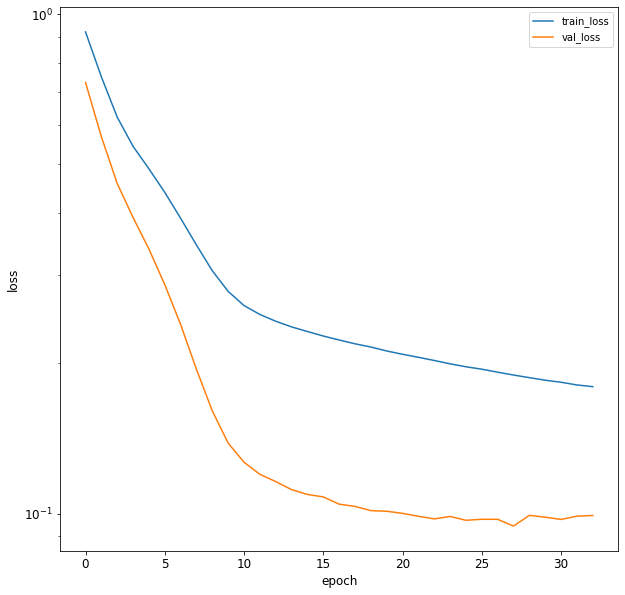

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,1569.0,7.027451,96.230560,1.0,5.0,1.0,1656.0,1772.0,1899.0,1634.0,1615.0,1474.0,1705.916667
8355,1546.0,6.772451,96.916800,1.0,5.0,1.0,1647.0,1740.0,1869.0,1614.0,1579.0,1453.0,1679.000000
8356,1523.0,6.772451,96.916800,2.0,5.0,1.0,1627.0,1710.0,1839.0,1581.0,1566.0,1435.0,1652.666667
8357,1494.0,6.772451,96.916800,2.0,5.0,1.0,1569.0,1684.0,1789.0,1555.0,1553.0,1406.0,1628.083333
8358,1474.0,6.752451,97.656980,2.0,5.0,1.0,1569.0,1656.0,1772.0,1541.0,1523.0,1394.0,1603.250000
8359,1471.0,6.732451,98.397160,2.0,5.0,1.0,1546.0,1647.0,1740.0,1535.0,1515.0,1372.0,1580.833333
8360,1467.0,6.732451,98.397160,3.0,5.0,1.0,1523.0,1627.0,1710.0,1527.0,1500.0,1366.0,1560.583333
8361,1448.0,6.732451,98.397160,3.0,5.0,1.0,1494.0,1569.0,1684.0,1515.0,1478.0,1341.0,1540.916667
8362,1444.0,6.087451,99.209612,3.0,5.0,1.0,1474.0,1569.0,1656.0,1496.0,1475.0,1355.0,1523.250000
8363,1431.0,5.442451,100.022064,3.0,5.0,1.0,1471.0,1546.0,1647.0,1487.0,1471.0,1322.0,1505.250000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


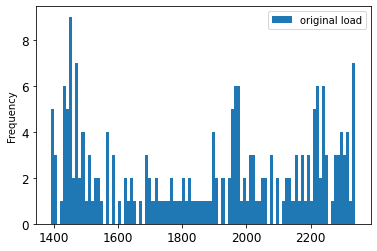

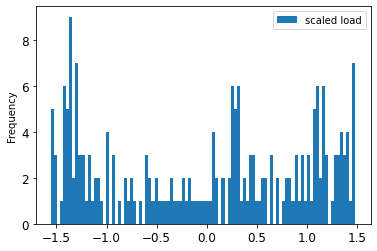

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.981931,-0.133559,0.469654,-1.498364,-1.004934,0.340279,-0.722444,-0.371953,0.021852,-0.707077,-0.779254,-1.161860,-0.595280,-1.081008
8355,-1.055440,-0.249231,0.540993,-1.498364,-1.004934,0.340279,-0.751537,-0.477246,-0.078785,-0.779146,-0.907989,-1.232720,-0.686228,-1.164104
8356,-1.128948,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-0.816186,-0.575957,-0.179422,-0.898060,-0.954476,-1.293457,-0.775206,-1.160908
8357,-1.221633,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-1.003670,-0.661507,-0.347150,-0.991750,-1.000964,-1.391311,-0.858270,-1.224829
8358,-1.285553,-0.258303,0.617938,-1.357685,-1.004934,0.340279,-1.003670,-0.753638,-0.404177,-1.042198,-1.108242,-1.431803,-0.942179,-1.256789
8359,-1.295141,-0.267376,0.694884,-1.357685,-1.004934,0.340279,-1.078017,-0.783252,-0.511523,-1.063819,-1.136850,-1.506037,-1.017923,-1.304729
8360,-1.307925,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.152364,-0.849059,-0.612160,-1.092647,-1.190489,-1.526282,-1.086345,-1.339885
8361,-1.368649,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.246106,-1.039902,-0.699379,-1.135888,-1.269160,-1.610640,-1.152797,-1.368649
8362,-1.381434,-0.559957,0.779343,-1.217006,-1.004934,0.340279,-1.310756,-1.039902,-0.793306,-1.204354,-1.279888,-1.563400,-1.212490,-1.381434
8363,-1.422982,-0.852537,0.863802,-1.217006,-1.004934,0.340279,-1.320453,-1.115581,-0.823497,-1.236785,-1.294192,-1.674751,-1.273310,-1.371846


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-0.981931,-0.133559,0.469654,-1.498364,-1.004934,0.340279,-0.722444,-0.371953,0.021852,-0.707077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931
8355,-1.055440,-0.249231,0.540993,-1.498364,-1.004934,0.340279,-0.751537,-0.477246,-0.078785,-0.779146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440
8356,-1.128948,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-0.816186,-0.575957,-0.179422,-0.898060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948
8357,-1.221633,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-1.003670,-0.661507,-0.347150,-0.991750,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633
8358,-1.285553,-0.258303,0.617938,-1.357685,-1.004934,0.340279,-1.003670,-0.753638,-0.404177,-1.042198,...,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553
8359,-1.295141,-0.267376,0.694884,-1.357685,-1.004934,0.340279,-1.078017,-0.783252,-0.511523,-1.063819,...,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141
8360,-1.307925,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.152364,-0.849059,-0.612160,-1.092647,...,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925
8361,-1.368649,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.246106,-1.039902,-0.699379,-1.135888,...,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649
8362,-1.381434,-0.559957,0.779343,-1.217006,-1.004934,0.340279,-1.310756,-1.039902,-0.793306,-1.204354,...,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434
8363,-1.422982,-0.852537,0.863802,-1.217006,-1.004934,0.340279,-1.320453,-1.115581,-0.823497,-1.236785,...,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434,-1.422982


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8364,-1.502882,-0.852537,0.863802,-1.076327,-1.004934,0.340279,-1.333383,-1.191260,-0.890589,-1.499837,...,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434,-1.422982,-1.502882
8365,-1.554019,-0.852537,0.863802,-1.076327,-1.004934,0.340279,-1.394800,-1.286681,-1.085153,-1.323268,...,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434,-1.422982,-1.502882,-1.554019
8366,-1.547626,-0.866146,0.863764,-1.076327,-1.004934,0.340279,-1.407730,-1.352489,-1.085153,-1.398941,...,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434,-1.422982,-1.502882,-1.554019,-1.547626
8367,-1.528450,-0.879754,0.863726,-1.076327,-1.004934,0.340279,-1.449752,-1.362360,-1.162308,-1.362906,...,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434,-1.422982,-1.502882,-1.554019,-1.547626,-1.528450
8368,-1.544430,-0.879754,0.863726,-0.935648,-1.004934,0.340279,-1.530564,-1.375521,-1.239463,-1.337682,...,-1.295141,-1.307925,-1.368649,-1.381434,-1.422982,-1.502882,-1.554019,-1.547626,-1.528450,-1.544430


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-1.384630
8365,-1.352669
8366,-1.352669
8367,-1.343081
8368,-1.269573
...,...
8461,-1.400610
8462,-1.426178
8463,-1.368649
8464,-1.343081


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8364,-1.502882,-1.502882,-1.422982,-1.381434,-1.368649,-1.307925,-1.295141,-1.285553,-1.221633,-1.128948,...,-1.076327,-1.004934,0.340279,-1.333383,-1.191260,-0.890589,-1.499837,-1.337103,-1.708494,-1.335538
8365,-1.554019,-1.554019,-1.502882,-1.422982,-1.381434,-1.368649,-1.307925,-1.295141,-1.285553,-1.221633,...,-1.076327,-1.004934,0.340279,-1.394800,-1.286681,-1.085153,-1.323268,-1.444382,-1.698371,-1.385940
8366,-1.547626,-1.547626,-1.554019,-1.502882,-1.422982,-1.381434,-1.368649,-1.307925,-1.295141,-1.285553,...,-1.076327,-1.004934,0.340279,-1.407730,-1.352489,-1.085153,-1.398941,-1.405046,-1.748985,-1.435779
8367,-1.528450,-1.528450,-1.547626,-1.554019,-1.502882,-1.422982,-1.381434,-1.368649,-1.307925,-1.295141,...,-1.076327,-1.004934,0.340279,-1.449752,-1.362360,-1.162308,-1.362906,-1.462262,-1.738862,-1.477452
8368,-1.544430,-1.544430,-1.528450,-1.547626,-1.554019,-1.502882,-1.422982,-1.381434,-1.368649,-1.307925,...,-0.935648,-1.004934,0.340279,-1.530564,-1.375521,-1.239463,-1.337682,-1.401470,-1.718617,-1.514056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.368649,-1.368649,-1.339885,-1.304729,-1.256789,-1.224829,-1.160908,-1.164104,-1.081008,-0.994715,...,-1.076327,0.516823,0.340279,-1.249339,-1.053063,-0.813434,-1.586320,-1.322799,-1.313703,-1.200383
8462,-1.381434,-1.381434,-1.368649,-1.339885,-1.304729,-1.256789,-1.224829,-1.160908,-1.164104,-1.081008,...,-1.076327,0.516823,0.340279,-1.281663,-1.141904,-0.853688,-1.579113,-1.397894,-1.276585,-1.255008
8463,-1.371846,-1.371846,-1.381434,-1.368649,-1.339885,-1.304729,-1.256789,-1.224829,-1.160908,-1.164104,...,-1.076327,0.516823,0.340279,-1.330151,-1.227454,-0.904007,-1.557493,-1.362135,-1.330574,-1.304565
8464,-1.384630,-1.384630,-1.371846,-1.381434,-1.368649,-1.339885,-1.304729,-1.256789,-1.224829,-1.160908,...,-0.935648,0.516823,0.340279,-1.365708,-1.224164,-1.034835,-1.575510,-1.337103,-1.273211,-1.344267


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.8930509090423584s


In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1876.235849
dtype: float64
Cons    313.629919
dtype: float64


In [47]:
load_mean=1876.235849
load_std=313.629919
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8364,1441.974588
8365,1451.998257
8366,1451.998257
8367,1455.005358
8368,1478.059795
...,...
8461,1436.962754
8462,1428.943819
8463,1446.986423
8464,1455.005358


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1427.0803],
       [1442.4464],
       [1431.6395],
       [1451.0394],
       [1479.4873],
       [1495.6097],
       [1522.5673],
       [1541.7468],
       [1574.5219],
       [1614.2273],
       [1670.089 ],
       [1735.4569],
       [1821.6895],
       [1866.3176],
       [1890.374 ],
       [1924.1317],
       [1945.4719],
       [1955.3318],
       [1959.6079],
       [1969.3462],
       [1971.4674],
       [1993.5912],
       [2018.0383],
       [2057.5972],
       [2076.106 ],
       [2055.647 ],
       [2007.2665],
       [1997.0072],
       [2005.3693],
       [1994.0273],
       [1982.6215],
       [2003.6118],
       [2027.0745],
       [2022.1018],
       [2048.5383],
       [2075.3953],
       [2063.6252],
       [2053.009 ],
       [2092.782 ],
       [2127.9626],
       [2129.8218],
       [2107.4468],
       [2141.661 ],
       [2144.25  ],
       [2142.5537],
       [2177.7332],
       [2180.2554],
       [2177.857 ],
       [2182.5728],
       [2218.8682],


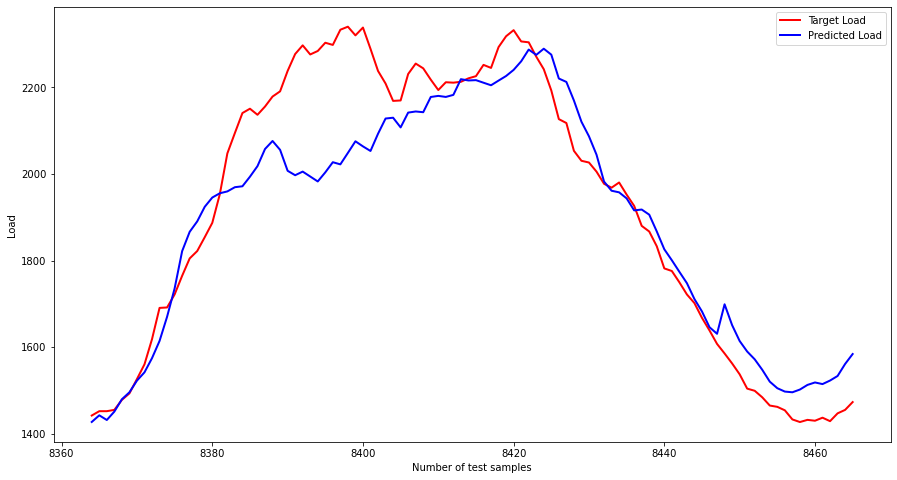

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

4.1136180490018015


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    0.944342
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  144098.491731
8365  145100.483532
8366  145101.227809
8367  145400.808323
8368  147705.882966
...             ...
8461  143590.872283
8462  142787.814800
8463  144592.676226
8464  145393.243355
8465  147197.261535

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364    221.839159
8365     91.237758
8366    414.477909
8367     15.728591
8368      2.037783
...            ...
8461   6028.068926
8462   8805.967480
8463   7452.465630
8464  11258.217954
8465  12318.320062

[102 rows x 1 columns]
y_t+100    13335.461883
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    115.47927
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1427.0803]
[1442.4464]
[1431.6395]
[1451.0394]
[1479.4873]
[1495.6097]
[1522.5673]
[1541.7468]
[1574.5219]
[1614.2273]
[1670.089]
[1735.4569]
[1821.6895]
[1866.3176]
[1890.374]
[1924.1317]
[1945.4719]
[1955.3318]
[1959.6079]
[1969.3462]
[1971.4674]
[1993.5912]
[2018.0383]
[2057.5972]
[2076.106]
[2055.647]
[2007.2665]
[1997.0072]
[2005.3693]
[1994.0273]
[1982.6215]
[2003.6118]
[2027.0745]
[2022.1018]
[2048.5383]
[2075.3953]
[2063.6252]
[2053.009]
[2092.782]
[2127.9626]
[2129.8218]
[2107.4468]
[2141.661]
[2144.25]
[2142.5537]
[2177.7332]
[2180.2554]
[2177.857]
[2182.5728]
[2218.8682]
[2215.8682]
[2216.6238]
[2210.6829]
[2204.7961]
[2215.5952]
[2226.224]
[2240.3318]
[2260.0837]
[2287.2424]
[2274.9453]
[2289.24]
[2275.4785]
[2220.3655]
[2212.498]
[2169.6748]
[2120.5686]
[2086.8389]
[2044.499]
[1982.2998]
[1961.1881]
[1957.4745]
[1943.5083]
[1915.7993]
[1917.7555]
[1905.8923]
[1867.1398]
[1825.933]
[1800.5946]
[1773.8812]
[1747.6705]
[1710.9841]
[1682.3215]
[1645.9359]
[1630.782]
[1698.887